In [1]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from PIL import Image

In [2]:

image=mpimg.imread('0.jpg')
image.shape
image

array([[105, 108, 109, ..., 172, 156, 136],
       [102, 106, 108, ..., 178, 167, 151],
       [ 99, 103, 107, ..., 180, 173, 163],
       ..., 
       [ 22,  22,  21, ...,  79,  80,  80],
       [ 20,  20,  21, ...,  75,  77,  78],
       [ 19,  20,  21, ...,  70,  73,  76]], dtype=uint8)

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


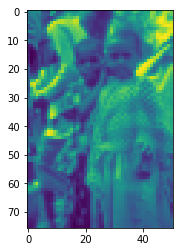

(76, 51)

In [3]:
from scipy import misc
image = misc.imresize(image, 0.2)
#image = scipy.skimage.transform.resize(image, 0.2)
plt.imshow(image)
#plt.axis('off')
plt.show()
image.shape

In [4]:
def image2vector (image):
    returnVect=np.zeros((1,image.shape[0]*image.shape[1]))
    print(returnVect.shape)
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            #print(str(i)+" "+str(j)+"  = "+str(256*i+j))
            returnVect[0,image.shape[1]*i+j]=image[i][j]
    return returnVect

vect = image2vector(image)
vect.shape

(1, 3876)


(1, 3876)

In [5]:
def compute_pca(data):
    m = np.mean(data, axis=0)
    datac = np.array([obs - m for obs in data])
    T = np.dot(datac, datac.T)
    [u,s,v] = np.linalg.svd(T)

    # here iteration is over rows but the columns are the eigenvectors of T
    pcs = [np.dot(datac.T, item) for item in u.T ]

    # note that the eigenvectors are not normed after multiplication by T^T
    pcs = np.array([d / np.linalg.norm(d) for d in pcs])

    return pcs, m, s, T, u

def compute_projections(I,pcs,m):
    projections = []
    for i in I:
        w = []
        for p in pcs:
            w.append(np.dot(i - m, p))
        projections.append(w)
    return projections

def reconstruct(w, X, m,dim = 5):
    return np.dot(w[:dim],X[:dim,:]) + m

def normalize(samples, maxs = None):
    # Normalize data to [0,1] intervals. Supply the scale factor or
    # compute the maximum value among all the samples.

    if not maxs:
        maxs = np.max(samples)
    return np.array([np.ravel(s) / maxs for s in samples])

In [8]:
vect.T.shape


(3876, 1)

In [11]:
pcs, m, s, T, u =compute_pca(image)


In [17]:
pcs.shape
T

array([[  99468.99515235,   83219.98199446,   76862.57409972, ...,
         -47309.03116343,  -46185.05747922,  -46239.93905817],
       [  83219.98199446,   80717.96883657,   83333.56094183, ...,
         -42625.04432133,  -41564.07063712,  -43030.95221607],
       [  76862.57409972,   83333.56094183,  111587.15304709, ...,
         -46828.45221607,  -49270.47853186,  -52314.3601108 ],
       ..., 
       [ -47309.03116343,  -42625.04432133,  -46828.45221607, ...,
          75198.94252078,   76033.91620499,   78272.03462604],
       [ -46185.05747922,  -41564.07063712,  -49270.47853186, ...,
          76033.91620499,   82541.8898892 ,   86643.00831025],
       [ -46239.93905817,  -43030.95221607,  -52314.3601108 , ...,
          78272.03462604,   86643.00831025,   93750.1267313 ]])

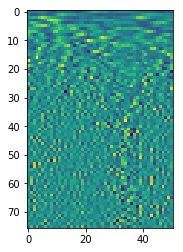

(76, 51)

In [16]:
plt.imshow(pcs)
#plt.axis('off')
plt.show()
pcs.shape

In [19]:
projections=compute_projections(image,pcs,m)

In [23]:
projections

AttributeError: 'list' object has no attribute 'size'

In [24]:
reconstruct(w, X, m,dim = 5)

NameError: name 'w' is not defined

In [87]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from PIL import Image
image=mpimg.imread('0.jpg')
image.shape
image

array([[105, 108, 109, ..., 172, 156, 136],
       [102, 106, 108, ..., 178, 167, 151],
       [ 99, 103, 107, ..., 180, 173, 163],
       ..., 
       [ 22,  22,  21, ...,  79,  80,  80],
       [ 20,  20,  21, ...,  75,  77,  78],
       [ 19,  20,  21, ...,  70,  73,  76]], dtype=uint8)

In [89]:
image.shape


(384, 256)

In [90]:
X=image

In [91]:
mean=np.mean(X, axis=0)
mean.shape

(256,)

In [92]:
print(X.shape)
X=X.astype(float) 
X -= mean
X

(384, 256)


array([[ 41.84895833,  45.52864583,  46.11979167, ...,  59.0859375 ,
         44.8359375 ,  26.30208333],
       [ 38.84895833,  43.52864583,  45.11979167, ...,  65.0859375 ,
         55.8359375 ,  41.30208333],
       [ 35.84895833,  40.52864583,  44.11979167, ...,  67.0859375 ,
         61.8359375 ,  53.30208333],
       ..., 
       [-41.15104167, -40.47135417, -41.88020833, ..., -33.9140625 ,
        -31.1640625 , -29.69791667],
       [-43.15104167, -42.47135417, -41.88020833, ..., -37.9140625 ,
        -34.1640625 , -31.69791667],
       [-44.15104167, -42.47135417, -41.88020833, ..., -42.9140625 ,
        -38.1640625 , -33.69791667]])

In [93]:
U, S, V = np.linalg.svd(X, full_matrices=False)

In [50]:
U, V = np.svd_flip(U, V)

AttributeError: module 'numpy' has no attribute 'svd_flip'

In [94]:
components_ = V

In [95]:
n_samples, n_features = X.shape



In [96]:
# Get variance explained by singular values
explained_variance_ = (S ** 2) / (n_samples - 1)
total_var = explained_variance_.sum()
explained_variance_ratio_ = explained_variance_ / total_var
singular_values_ = S.copy()  # Store the singular values.

In [100]:
from sklearn.utils.extmath import stable_cumsum
n_components =0.95
ratio_cumsum = stable_cumsum(explained_variance_ratio_)
print(ratio_cumsum.shape)
n_components = np.searchsorted(ratio_cumsum, n_components) + 1
print(n_components)

(256,)
37


In [101]:
noise_variance = explained_variance_[n_components:].mean()

In [102]:
print(U.shape)
print(S.shape)
print(V.shape)

(384, 256)
(256,)
(256, 256)


In [103]:
components_=components_[0:n_components,:]
print(n_components)
components_.shape

37


(37, 256)

In [104]:
X_transformed = np.dot(X, components_.T)

In [105]:
print(X_transformed.shape)
components_.T.shape

(384, 37)


(256, 37)

In [106]:
scaleX=X_transformed[:,0:n_components]
newComponents=components_[0:n_components,:]

In [107]:
newComponents.shape

(37, 256)

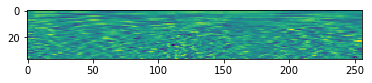

In [108]:
plt.imshow(newComponents)
plt.show()

In [110]:
np.dot(scaleX, components_) + mean

array([[  95.17887817,  106.09476262,  117.88414127, ...,  173.16202359,
         162.08141452,  158.86647525],
       [  92.36844257,  105.04590733,  116.05605603, ...,  177.09724847,
         168.05511172,  164.70551254],
       [  90.87256183,  103.91583865,  113.87569294, ...,  176.94952649,
         170.99789223,  168.57931277],
       ..., 
       [  24.24142072,   23.67303225,   20.49331371, ...,   86.77759377,
          80.52904765,   66.66356112],
       [  24.27812091,   22.29310074,   16.91711593, ...,   83.77758599,
          77.12496718,   63.67746674],
       [  21.45010831,   22.44364129,   17.29222072, ...,   79.92656698,
          73.75740844,   61.01340845]])

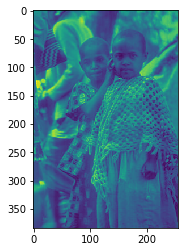

In [111]:
plt.imshow(X)
plt.show()

array([[105, 108, 109, ..., 172, 156, 136],
       [102, 106, 108, ..., 178, 167, 151],
       [ 99, 103, 107, ..., 180, 173, 163],
       ..., 
       [ 22,  22,  21, ...,  79,  80,  80],
       [ 20,  20,  21, ...,  75,  77,  78],
       [ 19,  20,  21, ...,  70,  73,  76]], dtype=uint8)